Computational Project 2 Source Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def heun(func, t, ic, h, var):
    '''
    Computes a single step of Heun's method for ODE approximation (A version of a RK2 formula)
    func: a slope function, 
    t: a starting time, 
    ic: a starting location (typically taken as the result of the last iteration), 
    h: a time step size
    Local tuncation error in 1D will be O(h^3)
    Global Error in 1D will be O(h^2)
    '''
    F1 = h*func(t, ic, var)
    F2 = h*func(t + h, ic + F1, var)
    return ic + 1/2*(F1 + F2)

In [3]:
def rk4(func, t, ic, h, var):
    '''
    Computes a single step of RK4 method for ODE approximation
    func: a slope function, 
    t: a starting time, 
    ic: a starting location (typically taken as the result of the last iteration), 
    h: a time step size
    Local tuncation error in 1D will be O(h^5)
    Global Error in 1D will be O(h^4)
    '''
    F1 = h*func(t, ic, var)
    F2 = h*func(t + h/2, ic + F1/2, var)
    F3 = h*func(t + h/2, ic + F2/2, var)
    F4 = h*func(t + h, ic + F3, var)
    return ic + 1/6*(F1 + 2*F2 + 2*F3 + F4)

In [4]:
def general_ODE(func, method, init_condition, numsteps, final_time, var = None):
    '''
    Numerically approximates solutions to multivariate ODEs IV problems
    Generalized to use a given method
    func: a multivariable slope function,
    method: Single step of a chosen method to approximate ODE solutions
    init_condition: vector which contains initial condition, initial time should be in the 0th index, other variables that the slope function derives should follow
    numsteps: number of steps that solution will have
    final_time: last time which the method approaches
    (final_time - initial_condition[0])/numsteps: This equation gives the step size for our method, which is important for calculating error
    Returns a solution matrix, where the ith row is a coordinate vector that gives the solution at time i*h
    '''
    num_var = np.size(init_condition) - 1 #Finding number of variable which are not time
    step_size = (final_time - init_condition[0])/numsteps
    time_array = np.arange(init_condition[0], final_time, step_size) #List of all times we will have a solution at
    solution = np.zeros((numsteps, num_var)) #Initializing solution matrix
    solution[0,] = init_condition[1:] #First row of solution matrix is our initial condition
    for i in np.arange(numsteps)[1:]:
        solution[i,] = method(func, time_array[i - 1], solution[i - 1,], step_size, var) #Finding the solution at each row using chosen method, method should be explict (uses only previous coordinate and time)
    return solution


Below is the example from Direction 1, showing how the code works for a 3D ODE:

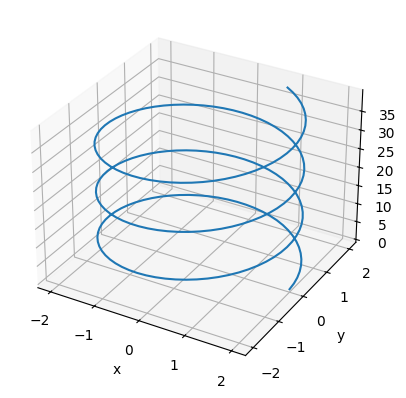

In [5]:
helix = lambda t, x, var, w = 1, k = 2: np.array([-w*x[1], w*x[0], k])
answer = general_ODE(helix, heun, [0, 2, 0, 0], 200, 20) #Using helix slope function from directions, and Heuns method for ODE approximation
fig, ax = plt.subplots(subplot_kw={'projection': "3d"})
ax.plot(*np.transpose(answer)) #The general_ODE function outputs a matrix, with the rows being coordinate vectors for our 3d space, but the 3D plot requires a matrix with coordinate vectors stored as columns
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

From description of ODE, solution should be a helix in a cylinder, so method appears to work for 3D ODEs

Below is an example of a 1D system, showing that it is still posible to use this code for systems of 1 dimension:

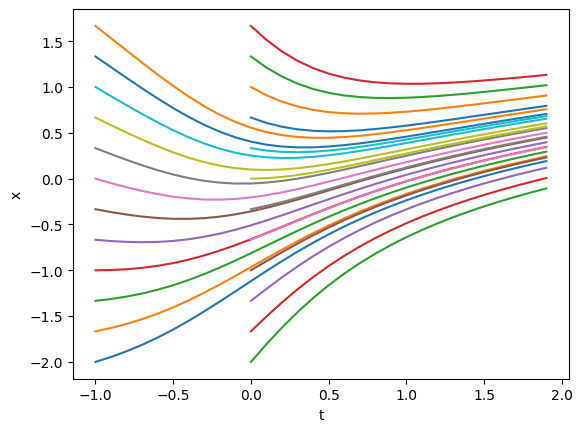

In [6]:
example = lambda t, x, var: (t - x)/(1 + t**2) #Funtion from ODE part 1 notes
fig, ax = plt.subplots()
for i in np.arange(-2, 2, 1/3): #Plotting multiple times using different initial x values, with inital time as -1
    ax.plot(np.arange(-1, 2, 1/10), general_ODE(example, heun, [-1, i], 30, 2)) #Uses huen method, until final time of 2, with 30 steps, making step sizes of (2 - (-1))/30 = 1/10
for i in np.arange(-2, 2, 1/3): #Plotting multiple times using different initial x values, with inital time as 0
    ax.plot(np.arange(0, 2, 1/10), general_ODE(example, heun, [0, i], 20, 2)) #Final time of 2, starts at 0, with 20 steps, making step sizes of (2 - (0))/20 = 1/10
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

Looks very similar to slope field and itegral curves from ODE notes 1, method seems to work for 1D solutions

Lets compare Heuns to RK4 for a single IVP with the same ODE as above:

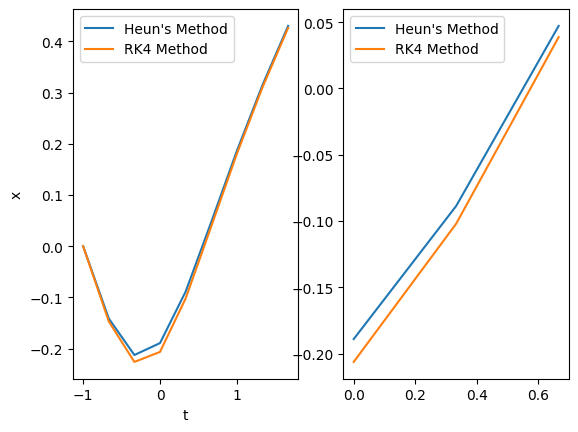

In [7]:
example = lambda t, x, var: (t - x)/(1 + t**2) #Funtion from ODE part 1 notes
heun_sol = general_ODE(example, heun, [-1, 0], 9, 2) #Step size of 1/3
rk4_sol = general_ODE(example, rk4, [-1, 0], 9, 2)
fig, ax = plt.subplots(1, 2)
ax[0].plot(np.arange(-1, 2, 1/3), heun_sol, label = "Heun's Method")
ax[0].plot(np.arange(-1, 2, 1/3), rk4_sol,  label = "RK4 Method")
ax[1].plot(np.arange(0, 1, 1/3), heun_sol[3:6], label = "Heun's Method")
ax[1].plot(np.arange(0, 1, 1/3), rk4_sol[3:6], label = "RK4 Method")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
plt.show()

Methods produce different solutions, however they are very similar

In [8]:
def lorenz_function(t, vector, var): #Lorenz Function, found on wikipedia
    Pr, Ra, B = var #unpacking variable vector for constants
    return np.array([Pr*(vector[1] - vector[0]), vector[0]*(Ra - vector[2]) - vector[1], vector[0]*vector[1] - B*vector[2]])


Lorenz Function Heun Method soluton:

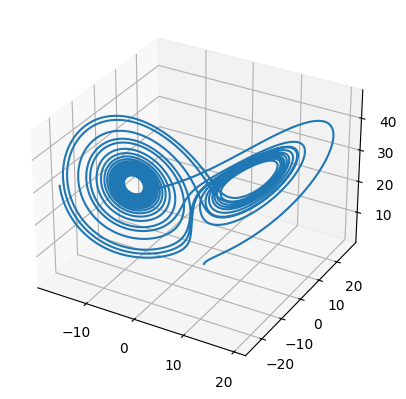

In [9]:
solution = general_ODE(lorenz_function, heun, [0, 2, 1, 1], 10000, 24, [10, 28, 8/3]) #Lorenz funtion with Pr = 10, Pa = 28, Beta = 8/3, one the time inteval [0, 24], w/ init cond [1, 1, 1]
fig, ax = plt.subplots(subplot_kw={'projection': "3d"})
ax.plot(*np.transpose(solution)) #The general_ODE function outputs a matrix, with the rows being coordinate vectors for our 3d space, but the 3D plot requires a matrix with coordinate vectors stored as columns
plt.show()

Lorenz Function RK4 Method soluton:

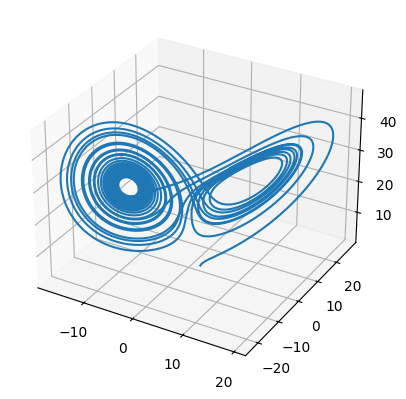

In [10]:
solution = general_ODE(lorenz_function, rk4, [0, 2, 1, 1], 10000, 24, [10, 28, 8/3]) #Lorenz funtion with Pr = 10, Pa = 28, Beta = 8/3, one the time inteval [0, 24], w/ init cond [1, 1, 1]
fig, ax = plt.subplots(subplot_kw={'projection': "3d"})
ax.plot(*np.transpose(solution)) #The general_ODE function outputs a matrix, with the rows being coordinate vectors for our 3d space, but the 3D plot requires a matrix with coordinate vectors stored as columns
plt.show()

Projecting Heun soltuion into 2D:

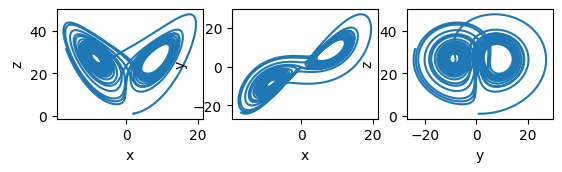

In [11]:
solution = general_ODE(lorenz_function, heun, [0, 2, 1, 1], 10000, 24, [10, 28, 8/3]) #Lorenz funtion with Pr = 10, Pa = 28, Beta = 8/3, one the time inteval [0, 24], w/ init cond [2, 1, 1]
fig, ax = plt.subplots(1, 3)
ax[0].plot(solution[:,0], solution[:,2]) #Projecting onto the xz plane
ax[0].set_box_aspect(0.75)
ax[0].set_xlabel("x")
ax[0].set_ylabel("z")
ax[1].plot(solution[:,0], solution[:,1]) #Projecting onto the xy plane
ax[1].set_box_aspect(0.75)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[2].plot(solution[:,1], solution[:,2]) #Projecting onto the yz plane
ax[2].set_box_aspect(0.75)
ax[2].set_xlabel("y")
ax[2].set_ylabel("z")
plt.show()

Projecting RK4 soltuion into 2D:

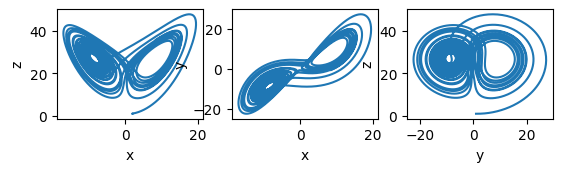

In [12]:
solution = general_ODE(lorenz_function, rk4, [0, 2, 1, 1], 10000, 24, [10, 28, 8/3]) #Lorenz funtion with Pr = 10, Pa = 28, Beta = 8/3, one the time inteval [0, 24], w/ init cond [2, 1, 1]
fig, ax = plt.subplots(1, 3)
ax[0].plot(solution[:,0], solution[:,2]) #Projecting onto the xz plane
ax[0].set_box_aspect(0.75)
ax[0].set_xlabel("x")
ax[0].set_ylabel("z")
ax[1].plot(solution[:,0], solution[:,1]) #Projecting onto the xy plane
ax[1].set_box_aspect(0.75)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[2].plot(solution[:,1], solution[:,2]) #Projecting onto the yz plane
ax[2].set_box_aspect(0.75)
ax[2].set_xlabel("y")
ax[2].set_ylabel("z")
plt.show()